In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn

In [ ]:
# Memuat dataset
file_path = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df = pd.read_csv(file_path)

In [ ]:
# Preprocessing data
df = df.dropna()  # Menghapus nilai yang hilang
X = df.drop(columns=["num"])  # Memisahkan fitur
y = (df["num"] > 0).astype(int)  # Klasifikasi biner (1: Penyakit, 0: Tidak ada penyakit)

In [ ]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Memprediksi hasil
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
# Menghitung metrik evaluasi
akurasi = accuracy_score(y_test, y_pred)
presisi = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [ ]:
# Menghitung kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

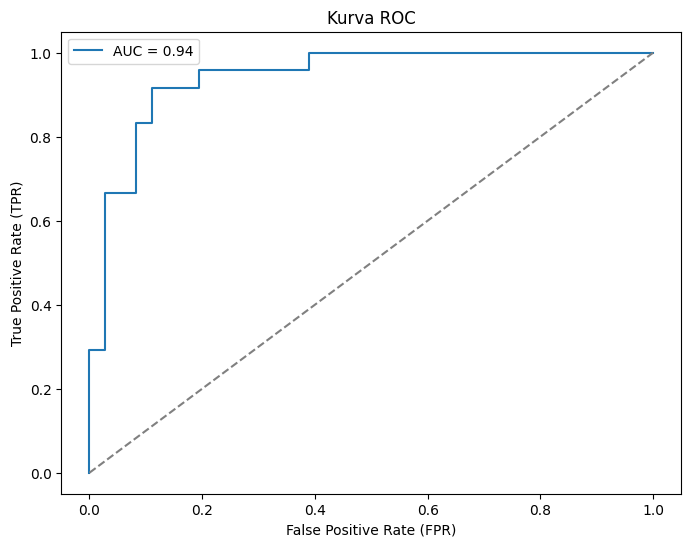

In [ ]:
# Menampilkan kurva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Kurva ROC')
plt.legend()
plt.show()

In [ ]:
# Menampilkan hasil evaluasi
print(f'Akurasi: {akurasi:.2f}')
print(f'Presisi: {presisi:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Akurasi: 0.87
Presisi: 0.83
Recall: 0.83
F1 Score: 0.83
ROC AUC Score: 0.94


#**Penjelasan Persamaan Matematika:**
1. Persamaan Logistic Regression
   
   **P(y=1) = 1 / (1 + e^(-z)), di mana z = wX + b**
   - Model ini menghitung probabilitas suatu data termasuk dalam kelas tertentu.
2. Akurasi
   
   **Accuracy = (TP + TN) / (TP + TN + FP + FN)**
   - Mengukur persentase prediksi yang benar dari seluruh data uji.
3. Presisi
   
   **Precision = TP / (TP + FP)**
   - Mengukur seberapa akurat prediksi positif yang dibuat model.
4. Recall
   
   **Recall = TP / (TP + FN)**
   - Mengukur seberapa baik model dalam menangkap semua kasus positif.
5. F1 Score
   
   **F1 = 2 * (Precision * Recall) / (Precision + Recall)**
   - Rata-rata harmonik antara presisi dan recall.
6. ROC AUC Score
   - Mengukur kemampuan model dalam membedakan antara kelas positif dan negatif dengan melihat luas di bawah kurva ROC.